

Build **kNN** and **logistic regression** classifiers using sklearn library to predict "passed" (label variable) by using given data. 
- Start the project with data processing such as converting non-numeric values to numerical ones,  data normalization, etc.
- Explore and analyze the data using feature visualization such as correlation heatmap, and distribution plots by commenting on your findings. Choose min. 3 features for the visualization step. 
- Then, shuffle and split your data into train and test sets randomly, with a ratio of 70:30. (Write your own shuffling and spliting code, do not use predefined function train_test_split).
- Build your models (with proper comments and explanations) using the training set.
- Compare these 2 classification models according to their accuracies (you can print accuracy values in a single table as a comprehensive view) over the test set. Comment on their classification performance.
- Plot confusion matrices for your models over the test set, and comment on the outcomes. 
- Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate/comment the prediction performance of each classifier. 

Notes:

* Choose the optimal k value using Minkowski distance (by trying two different p-values) for the kNN model.


* **Don't forget to add comments to your code lines to explain how your program works, and your intentions behind it. Also, do not forget to comment on the outcomes and comparisons.** 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import PrecisionRecallDisplay


In [2]:
dfset = pd.read_csv("data.csv")
display(dfset)
display(dfset.describe())
display(dfset.isna().sum())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

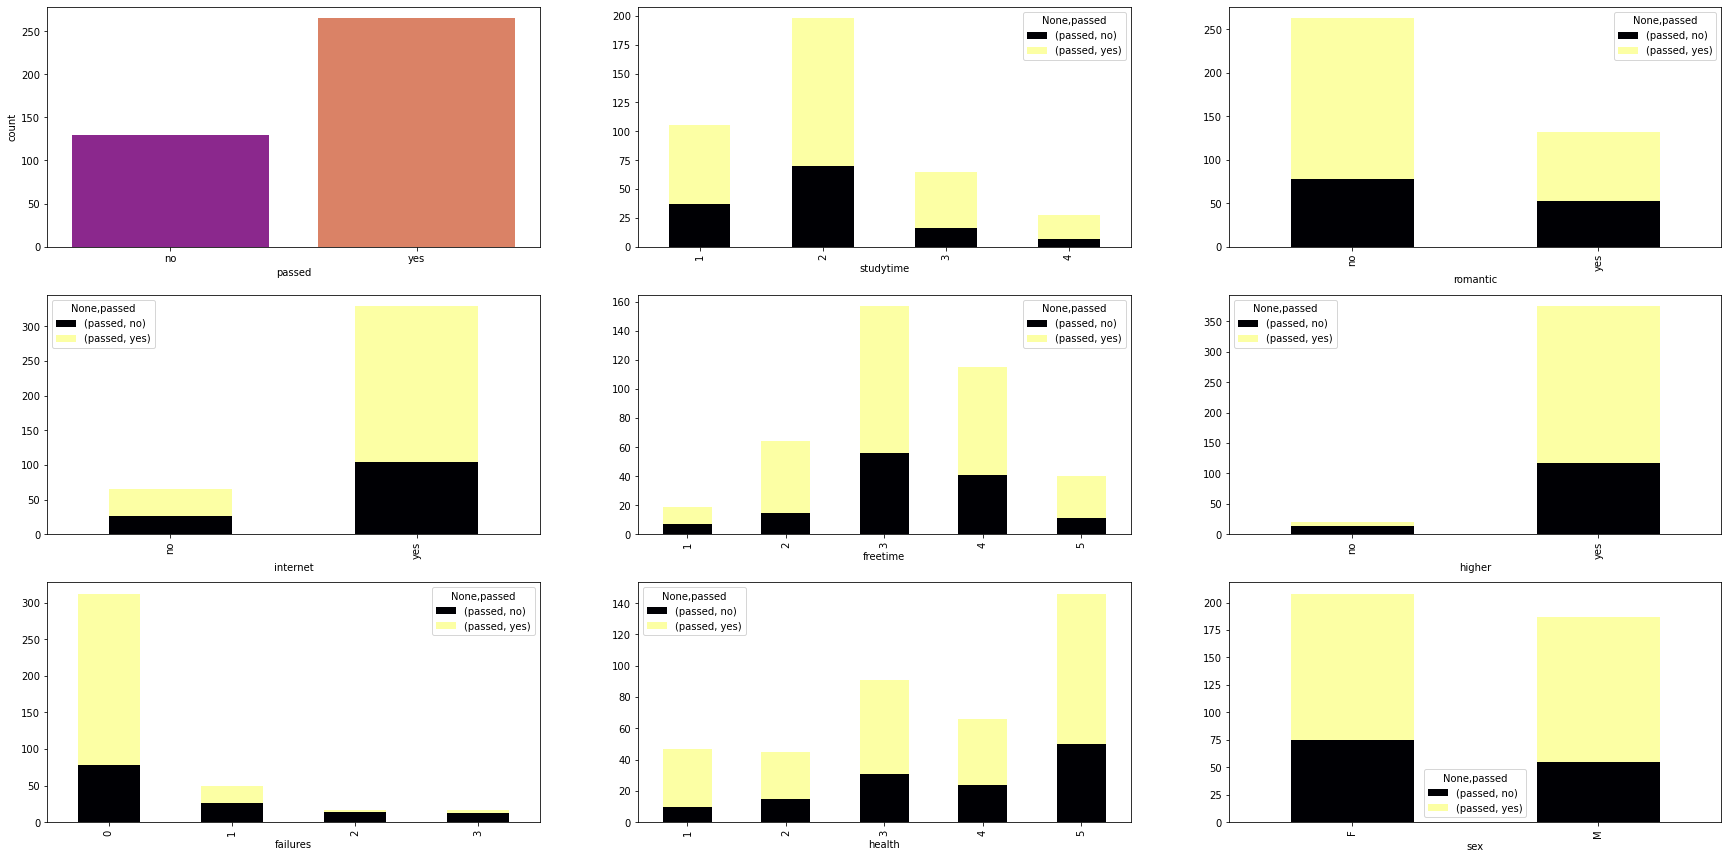

In [3]:
#VISUALIZATION

fig,ax = plt.subplots(3,3,figsize=(30,15))
sns.countplot(x="passed",data=dfset,ax=ax[0][0],palette="plasma")
dfset[["passed","studytime"]].pivot_table(index="studytime",columns=dfset["passed"],aggfunc="count").plot(kind="bar",stacked=True,ax=ax[0][1],colormap="inferno")
dfset[["passed","romantic"]].pivot_table(index='romantic', columns=dfset["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=ax[0][2],colormap="inferno")
dfset[["passed","internet"]].pivot_table(index='internet', columns=dfset["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=ax[1][0],colormap="inferno")
dfset[["passed","freetime"]].pivot_table(index='freetime', columns=dfset["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=ax[1][1],colormap="inferno")
dfset[["passed","higher"]].pivot_table(index='higher', columns=dfset["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=ax[1][2],colormap="inferno")
dfset[["passed","failures"]].pivot_table(index='failures', columns=dfset["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=ax[2][0],colormap="inferno")
dfset[["passed","health"]].pivot_table(index='health', columns=dfset["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=ax[2][1],colormap="inferno")
dfset[["passed","sex"]].pivot_table(index='sex', columns=dfset["passed"], aggfunc='count').plot(kind='bar', stacked=True,ax=ax[2][2],colormap="inferno")




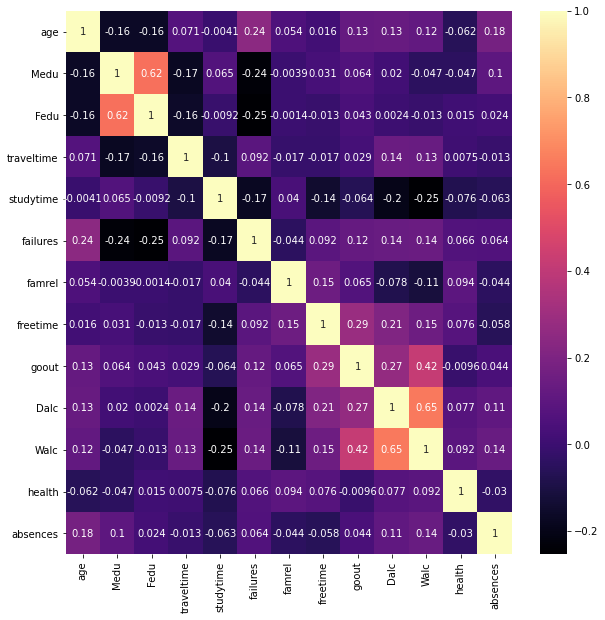

In [4]:
"""

    #HEATMAP
        for visualization relations

"""

fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(dfset.corr(),annot=True,cmap="magma")

In [5]:
dfset['school'] = dfset['school'].astype('str')
dfset["school"].replace(["GP","MS"],[0,1],inplace=True)

dfset['sex'] = dfset['sex'].astype('str')
dfset["sex"].replace(["F","M"],[0,1],inplace=True)

dfset['address'] = dfset['address'].astype('str')
dfset["address"].replace(["U","R"],[0,1],inplace=True)

dfset['famsize'] = dfset['famsize'].astype('str')
dfset["famsize"].replace(["LE3","GT3"],[0,1],inplace=True)

dfset['Pstatus'] = dfset['Pstatus'].astype('str')
dfset["Pstatus"].replace(["T","A"],[0,1],inplace=True)

dfset['internet'] = dfset['internet'].astype('str')
dfset["internet"].replace(["no","yes"],[0,1],inplace=True)

dfset['schoolsup'] = dfset['schoolsup'].astype('str')
dfset["schoolsup"].replace(["no","yes"],[0,1],inplace=True)

dfset['famsup'] = dfset['famsup'].astype('str')
dfset["famsup"].replace(["no","yes"],[0,1],inplace=True)

dfset['paid'] = dfset['paid'].astype('str')
dfset["paid"].replace(["no","yes"],[0,1],inplace=True)

dfset['activities'] = dfset['activities'].astype('str')
dfset["activities"].replace(["no","yes"],[0,1],inplace=True)

dfset['nursery'] = dfset['nursery'].astype('str')
dfset["nursery"].replace(["no","yes"],[0,1],inplace=True)

dfset['higher'] = dfset['higher'].astype('str')
dfset["higher"].replace(["no","yes"],[0,1],inplace=True)

dfset['romantic'] = dfset['romantic'].astype('str')
dfset["romantic"].replace(["no","yes"],[0,1],inplace=True)

dfset['passed'] = dfset['passed'].astype('str')
dfset["passed"].replace(["no","yes"],[0,1],inplace=True)

dfset = pd.get_dummies(data=dfset)


display(dfset)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,1,1,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,0,1,0,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,0,0,0,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,0,1,0,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,0,1,0,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,0,1,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,1,1,17,0,0,0,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,1,1,21,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,1,1,18,1,0,0,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [6]:
"""
#SCALING

"""

sc = MinMaxScaler()
dfset[dfset.columns] = sc.fit_transform(dfset[dfset.columns])

shuffled_df=dfset.sample(frac=1)
to_train=int(0.7*len(dfset))
trainset=shuffled_df[:to_train]
testset=shuffled_df[to_train:]

trainX= trainset.drop(["passed"],axis=1)
trainY=trainset["passed"]

testX=testset.drop(["passed"],axis=1)
testY=testset["passed"]


display(trainX.shape)


(276, 43)

0.7310924369747899


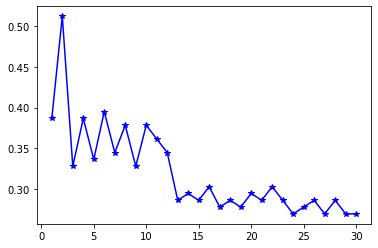

In [7]:
"""
knn
"""
listofKs=[]

def elbow(listofKs):
    minOne=listofKs[0]
    for i in listofKs:
        if minOne > i:
            minOne=i
    return minOne

rng=range(1,31)

for i in rng:
    knn= KNeighborsClassifier(i,metric="manhattan")
    knn.fit(trainX,trainY)
    listofKs.append(mean_squared_error(testY,knn.predict(testX)))
    
   


min = elbow(listofKs)

minOneForManhattan=listofKs.index(min)+1

knn = KNeighborsClassifier(minOneForManhattan,metric="manhattan") 
knn.fit(trainX,trainY)
predictedY=knn.predict(testX)
print(accuracy_score(testY,predictedY))

manhattan = accuracy_score(testY,predictedY)
plt.plot(rng,listofKs,"b-*")







0.7394957983193278


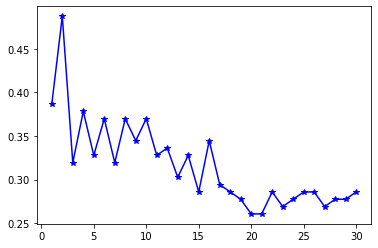

In [8]:
"""
knn
"""
listofKs=[]

def elbow(listofKs):
    minOne=listofKs[0]
    for i in listofKs:
        if minOne > i:
            minOne=i
    return minOne

rng=range(1,31)

for i in rng:
    knn= KNeighborsClassifier(i,metric="euclidean")
    knn.fit(trainX,trainY)
    listofKs.append(mean_squared_error(testY,knn.predict(testX)))
    
   


min = elbow(listofKs)

minOneForEuclidean=listofKs.index(min)+1

knn = KNeighborsClassifier(minOneForEuclidean,metric="euclidean") 
knn.fit(trainX,trainY)
predictedY=knn.predict(testX)
print(accuracy_score(testY,predictedY))
euclidean = accuracy_score(testY,predictedY)


plt.plot(rng,listofKs,"b-*")

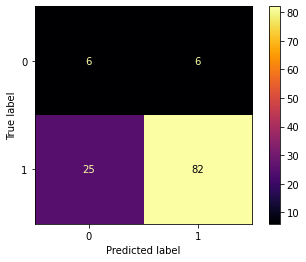

In [9]:
y_pred = knn.predict(testX.values)
matrix = confusion_matrix(y_pred,testY.values)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(cmap="inferno")
plt.show()

In [10]:
print(minOneForManhattan , " k value for manhattan and the score is :", manhattan )
print(minOneForEuclidean, " k value for euclidean and score is ", euclidean)

24  k value for manhattan and the score is : 0.7310924369747899
20  k value for euclidean and score is  0.7394957983193278


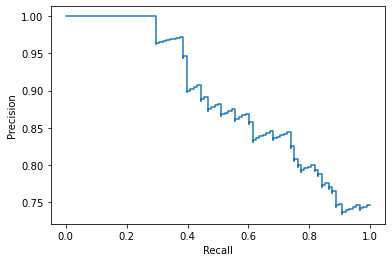

In [11]:
"""
Logistic regression

""" 
Regression = LogisticRegression()
Regression.fit(trainX,trainY)
predictedYforregression = Regression.predict(testX)





ScoreOfY = Regression.predict_proba(testX)[:, 1]
precision, recall, thresholds = precision_recall_curve(testY, ScoreOfY)


PrecisionRecallDisplay(precision=precision,recall=recall).plot()





# RECALL PRECISION GRAPH





Accuracy =  0.6890756302521008


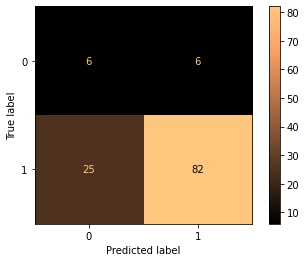

In [12]:
"""     
CONFUSION MATRIX OF LOGISTIC REGRESSION
"""
print("Accuracy = ", accuracy_score(predictedYforregression,testY))


matrix = confusion_matrix(predictedY,testY)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(cmap = "copper")
plt.show()

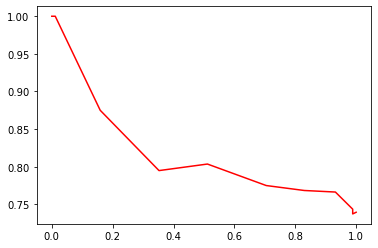

In [13]:
"""

    KNN MODEL PRECISION RECALL THRESHOLD 
    PRECISION RECALL PLOT

"""




knn.fit(trainX,trainY)
y_score = knn.predict_proba(testX)[:, 1]
precision, recall, thresholds = precision_recall_curve(testY, y_score)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='red')




#display plot
plt.show()